In [1]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

%matplotlib inline

plt.figure(figsize=(4,4))

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

In [2]:
# reading the dataset using pandas and since it is in .xlsx format we use read_excel
df = pd.read_excel('/Quickfreightdata.xlsx')

In [3]:
#looking at the first 5 rows of the dataset to get a rough idea about the data
df.head(5)

,ORDER_NBR,EQUIPMENT_TYPE,CUSTOMER_MILES,WEIGHT,ORDER_COST,FIRST_PICK_ZIP,FIRST_PICK_EARLY_APPT,FIRST_PICK_LATE_APPT,LAST_DELIVERY_ZIP,LAST_DELIVERY_EARLY_APPT,LAST_DELIVERY_LATE_APPT,IS_HAZARDOUS,CREATED_DATE
0,535361133,53 FLATBED,802,42000,0.00,21224,2015-07-13 07:30:00,2015-07-13 15:00:00,62707,2015-07-14 08:00:00,2015-07-14 16:00:00,N,2015-07-01 10:22:00
1,1499443993,V,0,40500,875.00,L1W 3H9,2015-07-06 14:00:00,2015-07-06 14:00:00,13619,2015-07-07 07:00:00,2015-07-07 16:00:00,N,2015-07-02 10:37:00
2,1058279607,NaN,774,0,88.14,46037,2015-07-01 08:00:00,2015-07-02 17:00:00,73107,2015-07-07 08:00:00,2015-07-07 17:00:00,N,2015-07-01 15:05:00
3,2093496262,V,0,40500,875.00,L1W 3H9,2015-07-07 14:00:00,2015-07-07 14:00:00,13619,2015-07-08 07:00:00,2015-07-08 16:00:00,N,2015-07-02 10:38:00
4,2373724838,V,0,40500,875.00,L1W 3H9,2015-07-08 14:00:00,2015-07-08 14:00:00,13619,2015-07-09 07:00:00,2015-07-09 16:00:00,N,2015-07-02 11:16:00


In [4]:
#ooking at the last 5 rows of the dataset to see how big the data is.
df.tail(5)

,ORDER_NBR,EQUIPMENT_TYPE,CUSTOMER_MILES,WEIGHT,ORDER_COST,FIRST_PICK_ZIP,FIRST_PICK_EARLY_APPT,FIRST_PICK_LATE_APPT,LAST_DELIVERY_ZIP,LAST_DELIVERY_EARLY_APPT,LAST_DELIVERY_LATE_APPT,IS_HAZARDOUS,CREATED_DATE
18734,675767319,R,707,26405,1500.0,84104,2015-09-01 11:00:00,2015-09-01 18:00:00,85353,2015-09-03 08:30:00,2015-09-03 08:30:00,N,2015-08-28 17:19:00
18735,2597037520,R,1230,42500,0.0,84088,2015-08-31 20:00:00,2015-08-31 20:00:00,76102,2015-09-03 13:00:00,2015-09-03 13:00:00,N,2015-08-28 17:22:00
18736,1272142564,R,1924,42000,2500.0,78521,2015-09-04 09:00:00,2015-09-04 17:00:00,95380,2015-09-07 07:00:00,2015-09-07 07:00:00,N,2015-09-03 08:31:00
18737,830532830,R,2185,40000,5300.0,4915,2015-09-03 14:30:00,2015-09-03 14:30:00,29209,2015-09-07 06:00:00,2015-09-07 06:00:00,N,2015-09-03 13:08:00
18738,1119673825,R,2185,40000,5300.0,4915,2015-09-03 14:30:00,2015-09-03 14:30:00,30336,2015-09-07 13:00:00,2015-09-07 13:00:00,N,2015-09-03 13:08:00


In [5]:
#Seeing the rows * columns of the dataset
df.shape

(18739, 13)

In [6]:
# checking the column names
df.columns

Index(['ORDER_NBR', 'EQUIPMENT_TYPE', 'CUSTOMER_MILES', 'WEIGHT', 'ORDER_COST',
       'FIRST_PICK_ZIP', 'FIRST_PICK_EARLY_APPT', 'FIRST_PICK_LATE_APPT',
       'LAST_DELIVERY_ZIP', 'LAST_DELIVERY_EARLY_APPT',
       'LAST_DELIVERY_LATE_APPT', 'IS_HAZARDOUS', 'CREATED_DATE'],
      dtype='object')

In [7]:
# dtypes is used to check datatypes of the columns
df.dtypes

ORDER_NBR                            int64
EQUIPMENT_TYPE                      object
CUSTOMER_MILES                       int64
WEIGHT                               int64
ORDER_COST                         float64
FIRST_PICK_ZIP                      object
FIRST_PICK_EARLY_APPT       datetime64[ns]
FIRST_PICK_LATE_APPT        datetime64[ns]
LAST_DELIVERY_ZIP                   object
LAST_DELIVERY_EARLY_APPT    datetime64[ns]
LAST_DELIVERY_LATE_APPT     datetime64[ns]
IS_HAZARDOUS                        object
CREATED_DATE                datetime64[ns]
dtype: object

In [8]:
#gives us info regarding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18739 entries, 0 to 18738
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ORDER_NBR                 18739 non-null  int64         
 1   EQUIPMENT_TYPE            17728 non-null  object        
 2   CUSTOMER_MILES            18739 non-null  int64         
 3   WEIGHT                    18739 non-null  int64         
 4   ORDER_COST                18733 non-null  float64       
 5   FIRST_PICK_ZIP            18739 non-null  object        
 6   FIRST_PICK_EARLY_APPT     18479 non-null  datetime64[ns]
 7   FIRST_PICK_LATE_APPT      18435 non-null  datetime64[ns]
 8   LAST_DELIVERY_ZIP         18739 non-null  object        
 9   LAST_DELIVERY_EARLY_APPT  18410 non-null  datetime64[ns]
 10  LAST_DELIVERY_LATE_APPT   18353 non-null  datetime64[ns]
 11  IS_HAZARDOUS              18739 non-null  object        
 12  CREATED_DATE      

In [9]:
#summary statistics
df.describe()

,ORDER_NBR,CUSTOMER_MILES,WEIGHT,ORDER_COST
count,1.873900e+04,18739.000000,18739.000000,18733.000000
mean,1.417056e+09,588.220556,25219.585837,954.230941
std,6.642482e+08,511.968568,16309.867000,938.818390
min,5.322560e+05,0.000000,0.000000,0.000000
25%,8.640125e+08,254.000000,8000.000000,400.000000
50%,1.417617e+09,436.000000,28192.000000,700.000000
75%,1.973634e+09,716.000000,42000.000000,1300.000000
max,2.821138e+09,3733.000000,300000.000000,8000.000000


In [10]:
# checking for duplicate values in the data set
df.duplicated().sum()

0

In [11]:
#checking for na values in the data set
df.isnull().sum()

ORDER_NBR                      0
EQUIPMENT_TYPE              1011
CUSTOMER_MILES                 0
WEIGHT                         0
ORDER_COST                     6
FIRST_PICK_ZIP                 0
FIRST_PICK_EARLY_APPT        260
FIRST_PICK_LATE_APPT         304
LAST_DELIVERY_ZIP              0
LAST_DELIVERY_EARLY_APPT     329
LAST_DELIVERY_LATE_APPT      386
IS_HAZARDOUS                   0
CREATED_DATE                   0
dtype: int64

In [12]:
# Impute missing values in EQUIPMENT_TYPE with the mode
mode_equipment_type = df["EQUIPMENT_TYPE"].mode()[0]
df["EQUIPMENT_TYPE"].fillna(mode_equipment_type, inplace=True)

In [13]:
#dropping rows which do not seem necessary
df.drop(['ORDER_NBR','FIRST_PICK_EARLY_APPT','FIRST_PICK_LATE_APPT','LAST_DELIVERY_EARLY_APPT','LAST_DELIVERY_LATE_APPT','CREATED_DATE'] , axis = 1 , inplace=True)

In [14]:
# Impute missing values in ORDER_COST with the mean
mean_order_cost = df["ORDER_COST"].mean()
df["ORDER_COST"].fillna(mean_order_cost, inplace=True)

In [15]:
df.isnull().sum()

EQUIPMENT_TYPE       0
CUSTOMER_MILES       0
WEIGHT               0
ORDER_COST           0
FIRST_PICK_ZIP       0
LAST_DELIVERY_ZIP    0
IS_HAZARDOUS         0
dtype: int64

In [16]:
# checking number of 0s in the data since NAs can be in the form of 0
df[df['WEIGHT']==0].count()

EQUIPMENT_TYPE       1202
CUSTOMER_MILES       1202
WEIGHT               1202
ORDER_COST           1202
FIRST_PICK_ZIP       1202
LAST_DELIVERY_ZIP    1202
IS_HAZARDOUS         1202
dtype: int64

In [17]:
#replacing 0 with mean weight
df['WEIGHT'] = df['WEIGHT'].replace(0, df['WEIGHT'].mean())

In [18]:
df['WEIGHT'].sort_values(ascending=False)[:10]

16424    300000.0
3429      79328.0
3767      77310.0
3768      77310.0
3047      72760.0
13263     47000.0
12994     47000.0
11958     47000.0
16178     47000.0
16181     47000.0
Name: WEIGHT, dtype: float64

In [19]:
 df = df.loc[df['WEIGHT'] <50000 ]

In [20]:
fig = go.Figure()
fig.add_trace(go.Box(y=df['WEIGHT'], name='Box Plot'))

# Customize the layout
fig.update_layout(
    title='Box Plot(WEIGHT)',
    yaxis_title='Values',
    xaxis=dict(showline=True, showgrid=False),
    yaxis=dict(showline=True, showgrid=True)
)
# Show the box plot
fig.show()

In [21]:
df[df['ORDER_COST']==0].count()

EQUIPMENT_TYPE       3527
CUSTOMER_MILES       3527
WEIGHT               3527
ORDER_COST           3527
FIRST_PICK_ZIP       3527
LAST_DELIVERY_ZIP    3527
IS_HAZARDOUS         3527
dtype: int64

In [22]:
#replacing columns with mean of the data
df['ORDER_COST'] = df['ORDER_COST'].replace(0,df['ORDER_COST'].mean())

In [23]:
df['ORDER_COST'].sort_values(ascending=False)[:10]

3749    8000.0
3750    8000.0
3751    8000.0
3752    8000.0
3755    8000.0
3754    8000.0
3753    8000.0
8217    7300.0
8215    7300.0
8216    7300.0
Name: ORDER_COST, dtype: float64

In [24]:
 df = df.loc[df['ORDER_COST'] < 5000]

In [25]:
# creates an empty figure object called fig
fig = go.Figure()

# go.box creates a go.box
fig.add_trace(go.Box(y=df['ORDER_COST'], name='Box Plot'))

# Customize the layout
fig.update_layout(
    title='Box Plot(ORDER_COST)',
    yaxis_title='Values',
    xaxis=dict(showline=True, showgrid=False),
    yaxis=dict(showline=True, showgrid=True)
)
# Show the box plot
fig.show()

In [26]:
df[df['CUSTOMER_MILES']==0].count()

EQUIPMENT_TYPE       208
CUSTOMER_MILES       208
WEIGHT               208
ORDER_COST           208
FIRST_PICK_ZIP       208
LAST_DELIVERY_ZIP    208
IS_HAZARDOUS         208
dtype: int64

In [27]:
df['CUSTOMER_MILES'] = df['CUSTOMER_MILES'].replace(0, df['CUSTOMER_MILES'].median())

In [28]:
 df = df.loc[df['CUSTOMER_MILES'] < 3000]

In [29]:
# Create a box plot
fig = go.Figure()
fig.add_trace(go.Box(y=df['CUSTOMER_MILES'], name='Box Plot'))

# Customize the layout
fig.update_layout(
    title='Box Plot(CUSTOMER_MILES)',
    yaxis_title='Values',
    xaxis=dict(showline=True, showgrid=False),
    yaxis=dict(showline=True, showgrid=True)
)
# Show the box plot
fig.show()

In [30]:
data = df['ORDER_COST']

# Create a histogram
fig = go.Figure(data=[go.Histogram(x=data)])

# Customize the layout (optional)
fig.update_layout(
    title='Histogram of ORDER_COST',
    xaxis_title='ORDER_COST',
    yaxis_title='Count',
    xaxis=dict(showline=True, showgrid=False),
    yaxis=dict(showline=True, showgrid=True)
)

# Show the histogram
fig.show()

Order_Cost is not normally distributed and there is skewness

In [31]:
x_data = df['CUSTOMER_MILES']
y_data = df['ORDER_COST']

# Create a scatter plot
fig = go.Figure(data=go.Scatter(x=x_data, y=y_data, mode='markers'))

# Customize the layout
fig.update_layout(
    title='Scatter Plot of CUSTOMER_MILES vs. ORDER_COST',
    xaxis_title='CUSTOMER_MILES',
    yaxis_title='ORDER_COST',
    xaxis=dict(showline=True, showgrid=False),
    yaxis=dict(showline=True, showgrid=True)
)

# Show the scatter plot
fig.show()


There is a positive correlation between order cost and customer_miles

In [32]:
x_data = df['WEIGHT']
y_data = df['ORDER_COST']

# Create a scatter plot
fig = go.Figure(data=go.Scatter(x=x_data, y=y_data, mode='markers'))

# Customize the layout (optional)
fig.update_layout(
    title='Scatter Plot of WEIGHT vs. ORDER_COST',
    xaxis_title='WEIGHT',
    yaxis_title='ORDER_COST',
    xaxis=dict(showline=True, showgrid=False),
    yaxis=dict(showline=True, showgrid=True)
)

# Show the scatter plot
fig.show()

There seems to be no correlation between weight and order_cost of the data

In [33]:
import scipy.stats as stats
groups = [group[1] for group in df.groupby('FIRST_PICK_ZIP')['ORDER_COST']]
F, p_value = stats.f_oneway(*groups)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences among the groups.")
else:
    print("Fail to reject the null hypothesis: There are no significant differences among the groups.")

Reject the null hypothesis: There are significant differences among the groups.


In [34]:
# checking unique value in the dataset
df['IS_HAZARDOUS'].value_counts()

N    18404
Y      218
Name: IS_HAZARDOUS, dtype: int64

In [35]:
import plotly.express as px
# Create a bar plot to count the categories
fig = px.bar(df['IS_HAZARDOUS'].value_counts().reset_index(), x='index', y='IS_HAZARDOUS', labels={'index': 'IS_HAZARDOUS', 'IS_HAZARDOUS': 'Count'})

# Customize the layout (optional)
fig.update_layout(
    title='Count of Hazardous vs. Non-Hazardous Shipments',
    xaxis_title='IS_HAZARDOUS',
    yaxis_title='Count',
)

# Show the bar plot
fig.show()


In [36]:
# Replace 'Y' with 1 and 'N' with 0 in the specified column
df['IS_HAZARDOUS'] = df['IS_HAZARDOUS'].replace({'Y': 1, 'N': 0})

# Display the DataFrame with replaced values
print(df['IS_HAZARDOUS'].head())

0    0
1    0
2    0
3    0
4    0
Name: IS_HAZARDOUS, dtype: int64


In [37]:
df['IS_HAZARDOUS'].value_counts()

0    18404
1      218
Name: IS_HAZARDOUS, dtype: int64

In [38]:
import scipy.stats as stats
# Assuming you have a DataFrame 'df' with a column 'ORDER_COST' and a column 'IS_HAZARDOUS'

# Separate data into two groups: hazardous and non-hazardous
hazardous_costs = df.loc[df['IS_HAZARDOUS'] == 1]['ORDER_COST']
non_hazardous_costs = df.loc[df['IS_HAZARDOUS'] == 0]['ORDER_COST']

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(hazardous_costs, non_hazardous_costs, equal_var=False)
#t_statistic, p_value = stats.ttest_ind(hazardous_costs, non_hazardous_costs)
# Set the significance level (alpha)
alpha = 0.05

# Compare p-value to alpha to make a decision
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in shipment cost.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in shipment cost.")

# Print t-statistic and p-value for reference
print("t-statistic:", t_statistic)
print("p-value:", p_value)


Fail to reject the null hypothesis. There is no significant difference in shipment cost.
t-statistic: -0.5509629819534884
p-value: 0.5821911993797128


In [39]:
# checking correlation
df.corr()

<ipython-input-39-f7ae3bb3d59c>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,CUSTOMER_MILES,WEIGHT,ORDER_COST,IS_HAZARDOUS
CUSTOMER_MILES,1.000000,0.091188,0.720621,-0.036707
WEIGHT,0.091188,1.000000,0.220002,0.092308
ORDER_COST,0.720621,0.220002,1.000000,-0.002487
IS_HAZARDOUS,-0.036707,0.092308,-0.002487,1.000000


<ipython-input-40-19b7fba43d4c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

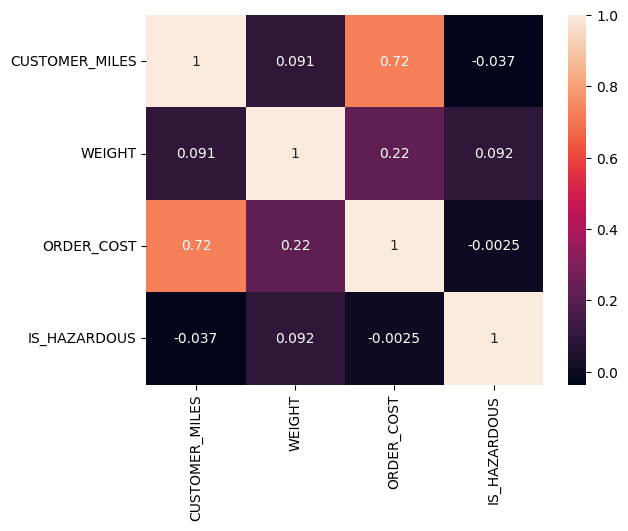

In [40]:
sns.heatmap(df.corr() , annot = True)

customer_miles has the highest correlation with target variable order_cost

In [41]:
# checking covariance
df.cov()

<ipython-input-41-bccc18421680>:2: FutureWarning:

The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,CUSTOMER_MILES,WEIGHT,ORDER_COST,IS_HAZARDOUS
CUSTOMER_MILES,234098.827291,6.527392e+05,2.580983e+05,-1.910380
WEIGHT,652739.152889,2.188802e+08,2.409399e+06,146.896437
ORDER_COST,258098.334768,2.409399e+06,5.479707e+05,-0.198045
IS_HAZARDOUS,-1.910380,1.468964e+02,-1.980454e-01,0.011570


<ipython-input-42-192576c87fd8>:1: FutureWarning:

The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

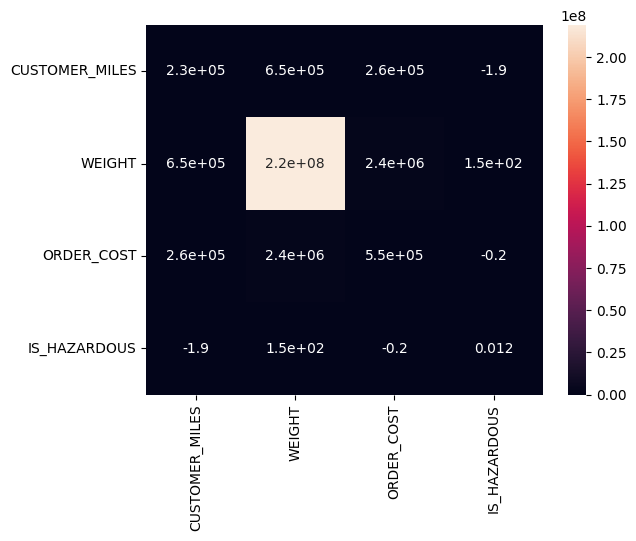

In [42]:
sns.heatmap(df.cov() , annot= True)

In [43]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming freight is your DataFrame with the dataset
# Define your ANOVA model with the independent variables
model = ols('ORDER_COST ~ CUSTOMER_MILES + WEIGHT ', data=df).fit()

# Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table to assess statistical significance
print(anova_table)


                      sum_sq       df             F         PR(>F)
CUSTOMER_MILES  5.049830e+09      1.0  20176.298719   0.000000e+00
WEIGHT          2.449422e+08      1.0    978.652047  2.006436e-209
Residual        4.660061e+09  18619.0           NaN            NaN


In [44]:
df.columns

Index(['EQUIPMENT_TYPE', 'CUSTOMER_MILES', 'WEIGHT', 'ORDER_COST',
       'FIRST_PICK_ZIP', 'LAST_DELIVERY_ZIP', 'IS_HAZARDOUS'],
      dtype='object')

In [45]:
#importing train test split from sklearn
from sklearn.model_selection import train_test_split

In [46]:
#importing ols ordinary least squares from statsmodels.formula.api
from statsmodels.formula.api import ols

In [47]:
#dropping columns not required for ML
x = df.drop(['EQUIPMENT_TYPE','ORDER_COST','FIRST_PICK_ZIP','LAST_DELIVERY_ZIP'] , axis=1)

In [48]:
# setting y(target) as order_cost
y = df['ORDER_COST']

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y , test_size = 0.2 , random_state = 101)

In [50]:
len(y_train)
print('Y target size:', len(y_train))
print('X train size:', len(x_train))
print('X test size:',len(x_test))
print('Y target size:', len(y_test))

Y target size: 14897
X train size: 14897
X test size: 3725
Y target size: 3725


In [51]:
# adding const_train column to the data
x_train = sm.add_constant(x_train)
x_train.head(20)
x_train.shape

(14897, 4)

In [52]:
#adding const_test column to the data
x_test= sm.add_constant(x_test)
x_test.head(20)
x_test.shape

(3725, 4)

In [53]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
#defining MAPE

In [54]:
from sklearn import metrics
scores = pd.DataFrame(columns=['Model','MAE_Train','MSE_Train','RMSE_Train','MAPE_Train','MAE_Test','MSE_Test','RMSE_Test','MAPE_Test','R^2'])


#definition of error metrics function
def get_metrics(train_act,train_pred,test_act,test_pred,model_description,dataframe):
    MAE_Train = metrics.mean_absolute_error(train_act,train_pred)
    MSE_Train = metrics.mean_squared_error(train_act,train_pred)
    RMSE_Train = np.sqrt(metrics.mean_squared_error(train_act,train_pred))
    MAPE_Train = mean_absolute_percentage_error(train_act,train_pred)
    MAE_Test = metrics.mean_absolute_error(test_act,test_pred)
    MSE_Test = metrics.mean_squared_error(test_act,test_pred)
    RMSE_Test = np.sqrt(metrics.mean_squared_error(test_act,test_pred))
    MAPE_Test = mean_absolute_percentage_error(test_act,test_pred)
    R2=metrics.r2_score(train_act,train_pred)
    s1=pd.Series([model_description,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R2],
                                           index=scores.columns)
    dataframe = dataframe.append(s1, ignore_index=True)
    return(dataframe)

In [55]:
model1 = sm.OLS(y_train,x_train[['const','WEIGHT']]).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:             ORDER_COST   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     738.1
Date:                Thu, 21 Sep 2023   Prob (F-statistic):          1.12e-158
Time:                        16:47:32   Log-Likelihood:            -1.1918e+05
No. Observations:               14897   AIC:                         2.384e+05
Df Residuals:                   14895   BIC:                         2.384e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        812.3530     12.195     66.616      0.0

In [56]:
scores1 = get_metrics (y_train , model1.predict(x_train[['const','WEIGHT']]),
                      y_test,model1.predict(x_test[['const','WEIGHT']]),"Simple Linear Regression (WEIGHT)",scores)
scores1

<ipython-input-54-684a30b8e91b>:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R^2
0,Simple Linear Regression (WEIGHT),497.401352,520891.352637,721.728032,66.558649,499.336971,523608.21692,723.607778,63.358134,0.047213


In [57]:
model2=sm.OLS(y_train,x_train[['const','CUSTOMER_MILES']]).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:             ORDER_COST   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                 1.580e+04
Date:                Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:47:32   Log-Likelihood:            -1.1416e+05
No. Observations:               14897   AIC:                         2.283e+05
Df Residuals:                   14895   BIC:                         2.283e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            467.6092      6.579     71.

In [58]:
scores2 = get_metrics (y_train , model2.predict(x_train[['const','CUSTOMER_MILES']]),
                      y_test,model2.predict(x_test[['const','CUSTOMER_MILES']]),"Simple Linear Regression (CUSTOMER_MILES)",scores)
scores2

<ipython-input-54-684a30b8e91b>:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R^2
0,Simple Linear Regression (CUSTOMER_MILES),350.247161,265271.723336,515.04536,45.92399,345.826739,255957.843469,505.922764,44.127833,0.514779


In [59]:
model3 = sm.OLS(y_train,x_train[['const','IS_HAZARDOUS']]).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:             ORDER_COST   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2442
Date:                Thu, 21 Sep 2023   Prob (F-statistic):              0.621
Time:                        16:47:32   Log-Likelihood:            -1.1954e+05
No. Observations:               14897   AIC:                         2.391e+05
Df Residuals:                   14895   BIC:                         2.391e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1102.4132      6.094    180.901   

In [60]:
scores3 = get_metrics (y_train , model3.predict(x_train[['const','IS_HAZARDOUS']]),
                      y_test,model3.predict(x_test[['const','IS_HAZARDOUS']]),"Categorical Linear Regression (IS_HAZARDOUS)",scores)
scores3

<ipython-input-54-684a30b8e91b>:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R^2
0,Categorical Linear Regression (IS_HAZARDOUS),517.072504,546693.6525,739.387349,69.652057,520.717152,552999.096124,743.63909,66.103726,0.000016


In [61]:
model4 = sm.OLS(y_train,x_train[['const','CUSTOMER_MILES','WEIGHT','IS_HAZARDOUS']]).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:             ORDER_COST   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     5798.
Date:                Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:47:32   Log-Likelihood:            -1.1378e+05
No. Observations:               14897   AIC:                         2.276e+05
Df Residuals:                   14893   BIC:                         2.276e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            273.0015      9.505     28.

In [62]:
scores4 = get_metrics (y_train , model4.predict(x_train[['const','CUSTOMER_MILES','WEIGHT','IS_HAZARDOUS']]),
                      y_test, model4.predict(x_test[['const','CUSTOMER_MILES','WEIGHT','IS_HAZARDOUS']]),"Multiple Linear Regression",scores)
scores4

<ipython-input-54-684a30b8e91b>:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Model,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test,R^2
0,Multiple Linear Regression,342.226821,252182.380184,502.177638,44.732296,337.709077,242305.364698,492.245228,43.225402,0.538721


MAE (RANGE) : 0 to infinity (closer to 0 is better score)

MSE (average squared difference) (RANGE) : O to infinity (closer to 0 is better score) Squaring the differences between predicted and actual values in MSE penalizes larger errors more than smaller errors.

RMSE  (the square root of the MSE and provides a measure of the average error with the same units as the target variable) (RANGE) : Non negative (closer to 0 better)

MAPE(MAPE calculates the average percentage difference between predicted and actual values.) : 0 % to positive infinity (closer to 0 is better)

R^2 (values range from 0 to 1. A higher R^2 indicates a better fit of the model to the data. )



In ordinary least squares (OLS) regression, we usually don't use log-likelihood directly. Instead, we're interested in finding the best-fitting line for our data. We do this by trying different lines and choosing the one that makes the sum of the squared errors (the differences between our predictions and the actual data points) as small as possible.

However, in some other types of models, like those used in advanced statistics, we use log-likelihood to find the best-fitting model. Log-likelihood is like a score that tells us how well our model fits the data.

For OLS, we don't typically need to worry about log-likelihood because the math behind it is simpler. We just focus on finding the line that fits our data best.

The binomial distribution: is a discrete probability distribution that models the number of successes  in a fixed number of independent and identical Bernoulli trials (experiments with two possible outcomes: success or failure), where each trial has a constant probability of success (usually denoted as "p")

Poisson : number of times an event occur in a time period

bernoulli : P(of success) in one trial

geometric : number of trials until first success

A t-test, short for "Student's t-test," is a statistical hypothesis test used to determine if there is a significant difference between the means of two groups

ANOVA, or Analysis of Variance, is a statistical hypothesis test used to determine if there are significant differences between the means of three or more groups. It extends the principles of the t-test

A Z-test is a statistical hypothesis test used to determine if the mean of a sample is significantly different from a known population mean when the population standard deviation is also known